# Our Class Plan in One Big Graph

![Course Plan](../images/ml.png)

# Lecture 9: Ensemble Learning

Ensemble learning is a type of machine learning where the learning algorithm combines multiple models to improve its predictive performance. The fundamental idea behind ensemble learning is that aggregating multiple models can yield a predictor with lower variance or bias than individual models. This is especially powerful when the individual predictors make different kinds of errors. In supervised learning, the prediction error can be decomposed as:
$$
\mathbb{E}[(\hat{f}(x) - f(x))^2] = \text{Bias}^2 + \text{Variance} + \text{Irreducible Noise}
$$
Ensemble methods work by reducing the variance term while keeping bias controlled.

## Combining different random variables

When we combine different random variables into an ensemble, the resulting ensemble may exhibit a lower variance than each random variable. This phenomenon arises due to the correlation or covariance structure among the individual random variables.

Consider two random variables $X$ and $Y$. The variance of their average is given by:
$$
\text{Var}\left(\frac{X+Y}{2}\right) = \frac{\text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X,Y)}{4}
$$
where $\text{Cov}(X,Y)$ is the covariance between $X$ and $Y$. We can generalize this to $n$ variables:

$$
\text{Var}\left(\frac{1}{n} \sum_{i=1}^n X_i \right) = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \text{Cov}(X_i, X_j)
$$

When the $X_i$ are uncorrelated, this reduces to $\text{Var}(\bar{X}) = \frac{1}{n} \text{Var}(X)$, showing how averaging reduces variance linearly with $n$

Recall that *correlation* measures the degree to which two random variables change together. 
$$
\rho_{X,Y} = \frac{\text{Cov}(X,Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}
$$
If the *covariance* between two variables is positive, they tend to increase or decrease together; if it's negative, they tend to move in opposite directions. On the other hand, *correlation*, which ranges from -1 to 1, measures the linear relationship between random variables where 1 indicates a perfect positive linear relationship while -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

When we combine different random variables where the individual random variables exhibit a low degree of correlation, or even negative covariance, the combined random variable may have reduced variability compared to the individual variables. When the individual random variables' predictions are not correlated, combining them tends to smooth out fluctuations, leading to reduced variability in the combined variable. If the individual variables' predictions are negatively correlated, combining them can cancel out some of the variability, again leading to reduced variability in the combined variable.

## An analogy with portfolio design

In finance, specifically in portfolio design theory, the goal is often to design a portfolio that achieves a desired level of return while minimizing the risk. The risk in this context is measured in terms of the variance of the returns. This is usually achieved via **portfolio diversification** where risk is reduced by combining different assets. By combining assets with uncorrelated or negatively correlated returns, investors potentially reduce the overall variance of the portfolio and lower the risk without sacrificing returns.

Mathematically, the variance of a portfolio composed of assets $X_i$ with weights $w_i\in [0,1]$ with $1 = \sum_i w_i$ is:
$$
\text{Var}\left(\sum_i w_i X_i\right) = \sum_i \sum_j w_i w_j \text{Cov}(X_i,X_j)
$$
Diversification involves holding a variety of investments in a portfolio that have different risk-return profiles.  When assets in a portfolio have low or negative correlations with each other, their returns tend to move independently or even in opposite directions over time. Minimizing variance thus involves selecting assets with low or negative covariance. As a result, when these assets are combined in a portfolio, the overall portfolio's variance or risk is reduced due to the offsetting effects of the individual asset returns. 

### Variance Reduction through Ensemble Averaging

When multiple independent models (or estimators) each produce predictions with some random noise, **averaging their predictions** can reduce the overall variance of the combined result.

Suppose each base model predicts a value with independent Gaussian noise:
$$
\hat{Y}_i \sim \mathcal{N}(f(x), \sigma^2)
$$
If we average $n$ such models, the ensemble prediction
$$
\bar{Y} = \frac{1}{n} \sum_{i=1}^n \hat{Y}_i
$$
has variance:
$$
\text{Var}(\bar{Y}) = \frac{\sigma^2}{n}
$$
This is a key statistical justification behind **bagging** (bootstrap aggregation) and other ensemble methods: **independent models reduce variance when averaged.**

The plot below demonstrates this principle using a simulation. We simulate many ensembles, each consisting of $n$ noisy predictors, and compute the empirical variance of their average. The theoretical curve $\sigma^2/n$ is also plotted for comparison.

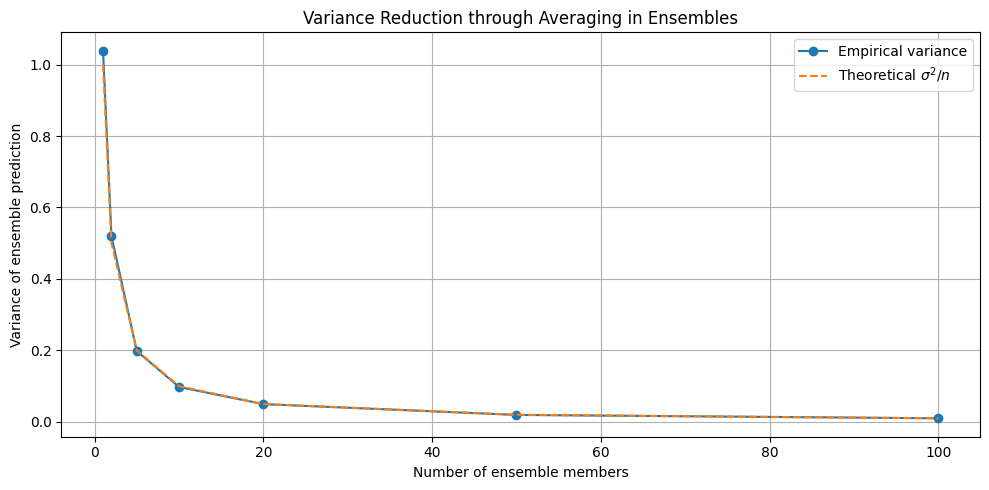

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n_ensembles = [1, 2, 5, 10, 20, 50, 100]  # different ensemble sizes
n_samples = 1000  # number of simulated ensembles
true_value = 0.0
sigma = 1.0  # standard deviation of individual predictor noise

variances = []

for n in n_ensembles:
    # Simulate n independent noisy predictions for each ensemble
    predictions = np.random.normal(loc=true_value, scale=sigma, size=(n_samples, n))
    ensemble_avg = predictions.mean(axis=1)  # average over ensemble members
    var_estimate = np.var(ensemble_avg)
    variances.append(var_estimate)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(n_ensembles, variances, marker='o', linestyle='-', label='Empirical variance')
plt.plot(n_ensembles, [sigma**2 / n for n in n_ensembles], linestyle='--', label='Theoretical $\\sigma^2/n$')
plt.xlabel("Number of ensemble members")
plt.ylabel("Variance of ensemble prediction")
plt.title("Variance Reduction through Averaging in Ensembles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Bagging

**Bagging** (Bootstrap Aggregating) is an ensemble method in which multiple models are trained independently, often in parallel, on different subsets of the training data. These subsets are generated by **random sampling with replacement** from the original dataset.

Each model is thus trained on a different bootstrap sample. Their predictions are aggregated via:

- **Averaging** (for regression),
- **Majority voting** (for classification).

Bagging reduces **variance** by averaging over multiple high-variance models, each exposed to different noise realizations in the data. This improves prediction accuracy, particularly for unstable base learners.

## Boosting

**Boosting** is an iterative ensemble method that trains base learners **sequentially**, where each new model focuses on correcting the errors of its predecessors.

At each iteration, the algorithm increases the importance (i.e., assigns higher weights) to the instances misclassified by earlier models. The final prediction is obtained by a **weighted combination** of the base models, where each weight reflects the performance of the corresponding learner.

Boosting reduces **bias** by focusing learning effort where the model currently performs poorly. It builds a strong composite predictor from a sequence of weak learners.

## Comparison of Bagging and Boosting

Bagging** improves stability by training models on different views of the data, thus averaging out the noise. It reduces variance but may retain the bias of the base learner. Boosting** focuses learning where the model underperforms, iteratively correcting mistakes and improving bias at the expense of potential variance increase.

<center><img width="500px" src="../images/bagging_vs_boosting.png"></center>

Bagging and boosting both combine multiple models to enhance prediction accuracy. However, they differ in how these models are trained, combined, and how they handle the bias–variance tradeoff.

| Feature | **Bagging** | **Boosting** |
|--|-|--|
| Objective | Reduce **variance** | Reduce **bias** |
| Training Strategy | Parallel, independent models | Sequential, error-focused models |
| Data Sampling | Bootstrap (with replacement) | Adaptive weighting or gradient-based |
| Instance Weights | Uniform across all models | Higher for misclassified instances |
| Aggregation | Averaging (regression), voting (classification) | Weighted sum of models |
| Base Model | Often deep or high-variance | Often shallow or weak learners |
| Noise Sensitivity | More robust | More sensitive to noise and outliers |
| Examples | Random Forest | AdaBoost, Gradient Boosting, XGBoost |


### Practical Implications

- Use **bagging** when your base model has high variance (e.g., decision trees) and your dataset is noisy.
- Use **boosting** when your base model has high bias and you want to refine its predictive capacity.

In practice ensemble models such as Random Forest models use bagging on decorrelated trees, and models such as XGBoost and LightGBM use Boosting and gradient optimization.


## Ensemble Classification Strategies

Having examined bagging and boosting as two fundamental paradigms of ensemble learning—each with its distinct approach to variance reduction, bias correction, and model aggregation—we now turn to ensemble strategies designed specifically for **multi-class classification**. In particular, when our base learners are binary classifiers, we must devise a mechanism for extending them to handle problems involving more than two classes. Two common and widely used frameworks for this purpose are **One-vs-Rest (OvR)** and **One-vs-One (OvO)** classification strategies. These techniques operate at the level of classifier orchestration rather than internal model structure, and can be combined with either bagging or boosting depending on the broader learning context.

Many of the ensemble techniques discussed thus far (e.g., decision trees, AdaBoost, gradient boosting) are inherently binary classifiers: they are designed to distinguish between two classes. However, in practice, many classification tasks involve more than two categories. To bridge this gap, we require **meta-strategies** that allow us to extend binary base learners to solve multi-class problems. The two most commonly used approaches are:

- **One-vs-Rest (OvR)**: also known as one-against-all, and
- **One-vs-One (OvO)**: also called pairwise classification.

These strategies are not tied to any specific learning algorithm. Rather, they provide a **systematic framework** for decomposing a $k$-class classification problem into a collection of binary decisions, enabling the use of ensemble methods even when the base learner is inherently binary. Importantly, OvR and OvO can be combined with either **bagging** or **boosting** depending on the model’s desired inductive bias, computational constraints, or performance goals.

We now examine these classification strategies in detail.

### One-vs-Rest (OvR) Classification

The **One-vs-Rest (OvR)** strategy, also known as *one-against-all*, provides a straightforward and computationally efficient approach for extending binary classification algorithms to multi-class settings. Given a classification problem with $k$ distinct classes, OvR constructs $k$ binary classifiers, denoted by $h_1, h_2, \dots, h_k$. Each classifier $h_i$ is trained to distinguish instances of class $i$ (treated as the positive class) from instances belonging to all other classes (treated as the negative class).

Formally, for a training instance $(x, y)$, the $i$-th classifier is trained with labels:
$$
y_i = \begin{cases}
1 & \text{if } y = i \\
0 & \text{otherwise}
\end{cases}
$$

During inference, all $k$ classifiers are evaluated on the test input $x$. Each classifier $h_i$ returns a score or confidence value, often interpreted as a probability $P(y = i \mid x)$. The final predicted class is the one with the highest score:
$$
\hat{y} = \arg\max_{i \in \{1, \dots, k\}} h_i(x)
$$

OvR has the advantage of requiring only $k$ classifiers, which scales linearly with the number of classes and is thus favorable for large-scale classification tasks. However, the main limitation of OvR lies in the **imbalance of class distributions** in each binary subproblem: each classifier sees only one class as positive and all others collapsed into a single negative category, which can skew the learning process, particularly when classes are imbalanced.


### One-vs-One (OvO) Classification

The **One-vs-One (OvO)** strategy, also known as *all-pairs* or *pairwise classification*, constructs a binary classifier for every pair of classes. Given $k$ classes, this yields:
$$
\binom{k}{2} = \frac{k(k-1)}{2}
$$
binary classifiers, each trained on a restricted subset of the data.

More precisely, the classifier $h_{i,j}$ is trained to distinguish between class $i$ and class $j$ using only the examples $(x, y)$ such that $y \in \{i, j\}$. All other instances are discarded during training of $h_{i,j}$. In prediction, each classifier casts a *vote* for one of the two classes:
$$
h_{i,j}(x) \in \{i, j\}
$$

Once all $\frac{k(k-1)}{2}$ classifiers have voted, the final prediction is made by majority rule:
$$
\hat{y} = \arg\max_{i} \sum_{j \ne i} \mathbf{1}\{ h_{i,j}(x) = i \}
$$

OvO has the advantage of **balanced binary classification tasks**, since each classifier is trained on data from only two classes. This often results in better empirical performance when the dataset suffers from class imbalance or when the classes are not linearly separable in the original space. However, the computational cost of training and evaluating $\mathcal{O}(k^2)$ classifiers can become prohibitive as $k$ grows large.


### Comparative Analysis

We now summarize key distinctions between OvR and OvO classification strategies:

| Criterion | One-vs-Rest (OvR) | One-vs-One (OvO) |
|--|--|--|
| Number of classifiers | $k$ | $\frac{k(k-1)}{2}$ |
| Training set size per classifier | Full dataset | Subset with two classes |
| Training time | Lower | Higher |
| Class imbalance handling | Less robust | More robust |
| Memory usage | Low | Moderate to high |
| Prediction cost | $k$ evaluations | $\mathcal{O}(k^2)$ evaluations |
| Preferred context | Large $k$, efficient training | Small $k$, balanced data |

In practice, **OvR** is often favored in large-scale problems due to its lower computational cost and simpler model management. Frameworks such as logistic regression and support vector machines frequently rely on OvR for multi-class generalization. In contrast, **OvO** tends to perform better in tasks with a relatively small number of classes or where balanced binary decisions yield more stable classifiers.

It is worth emphasizing that both OvR and OvO are **meta-strategies**: they do not prescribe a specific learning algorithm, but rather a structural decomposition of the multi-class problem. They can be combined with various base learners, such as decision trees, SVMs, or boosted models, and adapted to either bagging or boosting frameworks, depending on the design constraints and goals of the learning system.


## A Synthetic Example


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb
from lightgbm import LGBMClassifier

Below, I am going to generate a synthetic example to show differences between OvO and OvR classification schemes.

In [6]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=6,
                           n_classes=4, n_clusters_per_class=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Base model
base_model = LogisticRegression(max_iter=1000)

Now, let us implement OvO and OvR strategies and apply it to our base model.

In [7]:
# One-vs-Rest
ovr_model = OneVsRestClassifier(base_model)
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)
conf_ovr = confusion_matrix(y_test, y_pred_ovr)

# One-vs-One
ovo_model = OneVsOneClassifier(base_model)
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)
conf_ovo = confusion_matrix(y_test, y_pred_ovo)

Here are the results:

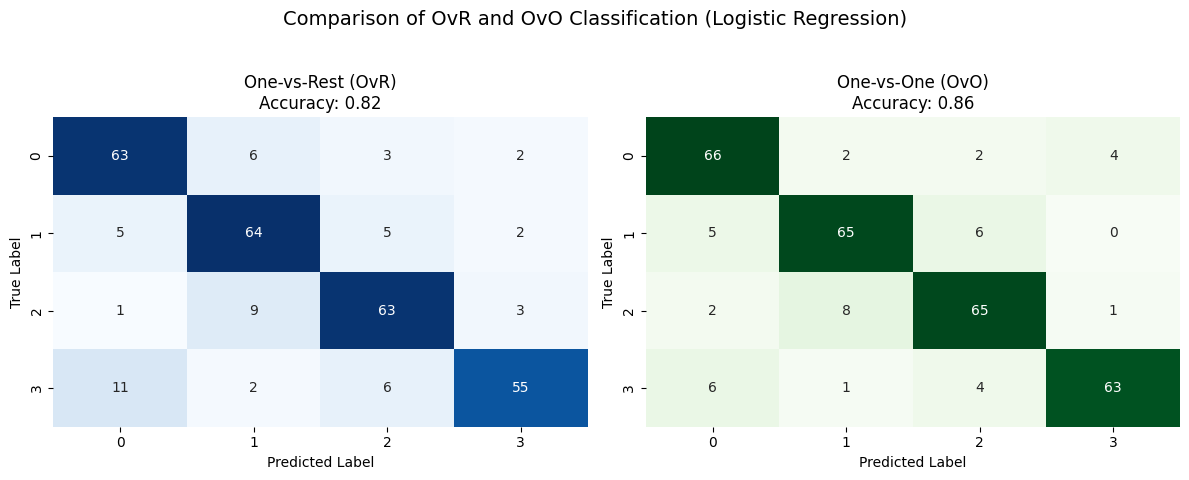

In [8]:
# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_ovr, annot=True, fmt='d', cmap="Blues", ax=axes[0], cbar=False)
axes[0].set_title(f"One-vs-Rest (OvR)\nAccuracy: {acc_ovr:.2f}")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(conf_ovo, annot=True, fmt='d', cmap="Greens", ax=axes[1], cbar=False)
axes[1].set_title(f"One-vs-One (OvO)\nAccuracy: {acc_ovo:.2f}")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.suptitle("Comparison of OvR and OvO Classification (Logistic Regression)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- **OvO achieved slightly higher accuracy (0.86)** compared to **OvR (0.82)**.  
- The confusion matrices show **OvO makes fewer large misclassifications**, likely due to its more balanced training subsets.
- **OvR trains only 4 classifiers**, while **OvO trains 6**, which is computationally more intensive but potentially more accurate.

As you can see OvR is simpler and faster, appropriate when the number of classes is large. But OvO often provides better performance on small- to mid-scale multi-class problems, especially when binary distinctions are more separable than one-vs-all boundaries.


## Random Forest

**Random Forest** is a powerful ensemble learning method introduced by Leo Breiman, and remains one of the most widely used algorithms for both classification and regression tasks. It is an instance of the **bagging** (bootstrap aggregating) framework, but introduces additional randomization in feature selection, making it especially robust and effective.

At its core, a random forest is an ensemble of **decision trees**, each trained on a different random subset of the training data. The final prediction is obtained by **aggregating the predictions** of all trees in the ensemble—via **majority voting** for classification, or **averaging** for regression:
$$
\hat{y}_{\text{RF}}(x) = \frac{1}{T} \sum_{t=1}^T h_t(x)
$$
where $h_t$ is the $t$-th tree in the ensemble.

### Training Procedure

Random Forest builds each tree using two layers of randomness:

1. **Bootstrap Sampling**: Each tree is trained on a bootstrap sample $\mathcal{D}_t$ drawn from the original dataset $\mathcal{D}$ with replacement. This introduces variation in training data across trees.

2. **Random Feature Selection**: At each node of the decision tree, a random subset of features of fixed size $m \ll p$ (where $p$ is the total number of features) is selected, and the split is chosen only among those features.

This process yields a collection of **decorrelated trees**, each with high variance but low bias. Aggregating these predictions significantly **reduces variance**, yielding a more stable and generalizable model.


### Motivation and Theoretical Justification

Random Forests operate under the principle that averaging multiple uncorrelated models reduces overall variance. More formally, if $\text{Var}(h_t(x)) = \sigma^2$ and the pairwise correlation between any two trees is $\rho$, then the variance of the aggregated forest predictor is:
$$
\text{Var}(\hat{y}_{\text{RF}}(x)) = \rho \sigma^2 + \frac{1 - \rho}{T} \sigma^2
$$
As $T \to \infty$, the second term vanishes, and the ensemble variance converges to $\rho \sigma^2$. Hence, minimizing the correlation $\rho$ between trees is crucial, which is precisely what the random feature subspace selection achieves.


### Comparison to Standard Bagging

Standard bagging (as applied to decision trees) reduces variance by averaging across multiple high-variance estimators. However, if the base learners are highly correlated (e.g., because all trees greedily split on the same dominant features), bagging’s variance reduction is limited. Random Forest mitigates this by **injecting feature randomness**, ensuring that different trees explore different partitions of the input space.

Thus, Random Forest is best seen as **decorrelated bagging**, combining the strengths of tree ensembles with effective variance reduction.


### Properties and Advantages

- **Robustness**: Performs well on high-dimensional data and in the presence of noise.
- **Non-parametric**: No assumptions on the underlying data distribution.
- **Feature Importance**: Can provide estimates of feature relevance via mean decrease in impurity or permutation importance.
- **Out-of-Bag Estimation**: Offers an unbiased estimate of generalization error using samples not included in the bootstrap training set.


### Practical Considerations

Key hyperparameters in Random Forest include:
- `n_estimators`: the number of trees in the forest.
- `max_features`: the number of features considered at each split (commonly $\sqrt{p}$ for classification, $p/3$ for regression).
- `max_depth`, `min_samples_split`, `min_samples_leaf`: to control individual tree complexity and prevent overfitting.
- `bootstrap`: whether to use bootstrap sampling (can be turned off for subsampling).

Random Forest often serves as a **strong baseline** in practical machine learning workflows and is especially valuable in tabular data tasks, offering high accuracy, interpretability, and resistance to overfitting.


For a theoretical introduction, see *L. Breiman, “Random Forests,” Machine Learning, vol. 45, no. 1, pp. 5–32, 2001.*


In [9]:
def experiment(X,y,strategy,model,test=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    res = strategy(model).fit(X_train, y_train)
    y_pred = res.predict(X_test)
    return classification_report(y_test, y_pred)

### IRIS Dataset

In [10]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

In [11]:
print(experiment(iris_X, iris_y,OneVsRestClassifier,RandomForestClassifier(n_estimators=10)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        12
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [12]:
print(experiment(iris_X, iris_y,OneVsOneClassifier,RandomForestClassifier(n_estimators=10)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.79      1.00      0.88        11
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38



In [13]:
print(experiment(iris_X, iris_y,OneVsRestClassifier,LogisticRegression(max_iter=3000)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.80      0.80      0.80        10
           2       0.86      0.86      0.86        14

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38



In [14]:
print(experiment(iris_X, iris_y, OneVsOneClassifier, SVC()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



### Digits Dataset

In [15]:
digits = load_digits()
digits_X = digits.data
digits_y = digits.target

In [16]:
print(experiment(digits_X, digits_y, OneVsRestClassifier, RandomForestClassifier(n_estimators=10)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       0.93      0.97      0.95        39
           2       1.00      1.00      1.00        57
           3       1.00      0.90      0.95        49
           4       1.00      0.98      0.99        48
           5       0.95      0.98      0.96        55
           6       0.98      1.00      0.99        46
           7       0.98      1.00      0.99        43
           8       0.83      0.91      0.87        33
           9       0.94      0.85      0.89        39

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [17]:
print(experiment(digits_X, digits_y, OneVsRestClassifier, LogisticRegression(max_iter=4000)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.93      0.95      0.94        44
           2       1.00      1.00      1.00        53
           3       0.95      0.91      0.93        46
           4       1.00      1.00      1.00        41
           5       0.94      0.98      0.96        61
           6       0.98      1.00      0.99        43
           7       1.00      0.95      0.97        40
           8       0.85      0.89      0.87        37
           9       0.97      0.90      0.94        40

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [33]:
print(experiment(digits_X, digits_y, OneVsOneClassifier, SVC()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        53
           3       0.98      0.98      0.98        50
           4       1.00      0.98      0.99        41
           5       0.94      0.97      0.96        34
           6       0.98      1.00      0.99        46
           7       1.00      0.98      0.99        46
           8       0.95      0.98      0.97        43
           9       0.98      0.93      0.95        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



## AdaBoost

**AdaBoost** (short for *Adaptive Boosting*) is a sequential ensemble learning algorithm that constructs a strong classifier by linearly combining multiple **weak learners**, each of which performs only slightly better than random guessing. The key idea behind AdaBoost is to iteratively train a sequence of models, where each model focuses increasingly on the training instances that were misclassified by its predecessors.

In each round, AdaBoost adjusts the weights of the training examples: examples that were misclassified by the previous model are given higher weight, making them more influential in the next round. After a fixed number of rounds (or until convergence), the final classifier is constructed as a **weighted majority vote** of the individual weak learners.

AdaBoost adaptively re-weights the training data to focus successive learners on the hardest examples. It transforms weak learners into a highly accurate ensemble by minimizing an exponential loss function and can be interpreted as performing **functional gradient descent in function space**.

Despite its simplicity, AdaBoost remains a foundational method in ensemble learning, and many modern boosting algorithms (e.g., Gradient Boosting, XGBoost) are generalizations of its core ideas.

### Training Procedure

AdaBoost proceeds in $T$ boosting rounds. Let the training dataset be $\{(x_i, y_i)\}_{i=1}^n$ with labels $y_i \in \{-1, +1\}$.

1. **Initialization**: Assign uniform weights to each data point:
   $$
   D_1(i) = \frac{1}{n} \quad \text{for all } i = 1, \dots, n
   $$

2. **Iterative Training** (for $t = 1$ to $T$):

   - Train a weak learner $h_t(x)$ on the weighted training data $D_t$.
   - Compute the weighted error of $h_t$:
     $$
     \varepsilon_t = \sum_{i=1}^n D_t(i) \cdot \mathbf{1}\left\{ h_t(x_i) \ne y_i \right\}
     $$
   - Compute the **boosting coefficient** (or model weight):
     $$
     \alpha_t = \frac{1}{2} \log\left( \frac{1 - \varepsilon_t}{\varepsilon_t} \right)
     $$
   - Update the weights for the next round:
     $$
     D_{t+1}(i) = \frac{D_t(i) \cdot e^{-\alpha_t y_i h_t(x_i)}}{Z_t}
     $$
     where $Z_t$ is a normalization constant ensuring $\sum_i D_{t+1}(i) = 1$.

This update rule **increases the weight** of misclassified points and **decreases the weight** of correctly classified ones, thus directing the attention of future learners toward more difficult cases.


### Final Prediction

After $T$ iterations, the final classifier is given by:
$$
H(x) = \text{sign} \left( \sum_{t=1}^T \alpha_t h_t(x) \right)
$$

This is a **weighted majority vote**, where each learner's vote is scaled by its confidence $\alpha_t$. Learners with higher accuracy have a greater influence on the ensemble decision.

### Choice of Base Learner

Although AdaBoost can, in theory, use any weak learner, it is most commonly used with **decision stumps**—decision trees with depth 1. These stumps are computationally efficient, less prone to overfitting, and align well with AdaBoost's theoretical foundations, which assume the base learner minimizes weighted classification error.

### Binary vs Multi-Class Classification

Originally formulated for binary classification, AdaBoost has been extended to multi-class settings via strategies such as:

- **One-vs-Rest (OvR)**: Train $k$ binary AdaBoost classifiers, each distinguishing one class against the rest.
- **One-vs-One (OvO)**: Train $\frac{k(k-1)}{2}$ pairwise classifiers.
- **SAMME and SAMME.R** algorithms**: Direct generalizations of AdaBoost for multi-class settings without needing decomposition into binary subproblems.

In binary classification, the final prediction can also be interpreted probabilistically via:
$$
P(y = +1 \mid x) \approx \frac{1}{1 + e^{-2F(x)}}, \quad \text{where } F(x) = \sum_t \alpha_t h_t(x)
$$


In [19]:
print(experiment(iris_X,iris_y,OneVsOneClassifier,AdaBoostClassifier(estimator=LogisticRegression(max_iter=2000)),test=0.25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        12
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [34]:
print(experiment(digits_X, digits_y, OneVsOneClassifier, AdaBoostClassifier(),test=0.25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        42
           2       1.00      1.00      1.00        55
           3       0.98      0.90      0.94        49
           4       0.98      0.93      0.95        43
           5       0.90      0.95      0.93        40
           6       1.00      1.00      1.00        47
           7       0.94      1.00      0.97        50
           8       0.93      0.93      0.93        43
           9       0.98      0.93      0.95        44

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [36]:
print(experiment(digits_X, digits_y, OneVsOneClassifier, AdaBoostClassifier(),test=0.25))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.96      0.96      0.96        50
           2       1.00      0.98      0.99        45
           3       0.94      0.87      0.91        39
           4       0.98      0.98      0.98        48
           5       0.95      0.98      0.96        53
           6       0.98      1.00      0.99        50
           7       0.97      1.00      0.99        39
           8       0.93      0.88      0.90        43
           9       0.93      0.98      0.95        42

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [37]:
print(experiment(digits_X, digits_y, OneVsRestClassifier, AdaBoostClassifier(estimator=SVC(max_iter=2000, probability=True)),test=0.25))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        38
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        47
           6       0.10      1.00      0.17        43
           7       0.00      0.00      0.00        45
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        39

    accuracy                           0.10       450
   macro avg       0.01      0.10      0.02       450
weighted avg       0.01      0.10      0.02       450



/home/kaygun/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LightGBM

**LightGBM** (Light Gradient Boosting Machine) is a gradient boosting framework designed for **efficiency, scalability, and high predictive accuracy**. It builds an ensemble of decision trees in a sequential manner, where each tree is trained to minimize the residual errors (i.e., the gradient of the loss function) of the current model. This is conceptually rooted in **functional gradient descent** and generalizes the ideas underlying AdaBoost and traditional boosting algorithms.

Formally, given a training dataset $\{(x_i, y_i)\}_{i=1}^n$ and a differentiable loss function $\mathcal{L}(y, \hat{y})$, the model seeks to minimize the empirical risk:
$$
\min_{F} \sum_{i=1}^n \mathcal{L}(y_i, F(x_i))
$$
LightGBM constructs $F(x)$ as an additive model:
$$
F(x) = \sum_{t=1}^T f_t(x), \quad f_t \in \mathcal{H}
$$
where each $f_t$ is a decision tree (from a function class $\mathcal{H}$), and each iteration adds a new tree $f_t$ trained to fit the **negative gradient** of the loss at the current step.


### Histogram-based Split Finding

One of the most distinguishing features of LightGBM is its **histogram-based algorithm** for constructing decision trees. Instead of evaluating all possible split points, LightGBM first discretizes continuous features into $k$ bins (usually $k = 255$ by default). Then, for each bin, it computes histograms of gradient statistics (first- and second-order derivatives of the loss), and uses these summaries to find the best approximate split.

This binning strategy:

- Reduces memory usage (no need to sort or store all feature values),
- Speeds up computation (faster split finding),
- Naturally supports **categorical features** without the need for one-hot encoding or manual transformation.


### Leaf-wise Tree Growth

Unlike traditional level-wise algorithms (e.g., XGBoost), which expand the tree layer-by-layer, LightGBM employs a **leaf-wise tree growth strategy**. At each step, the algorithm chooses the leaf that yields the greatest reduction in loss and splits it. This greedy approach leads to **asymmetrical trees** that are deeper on paths with higher potential for gain:
$$
\text{split leaf } \ell^* = \arg\max_{\ell} \text{gain}(\ell)
$$

While this strategy tends to improve accuracy by focusing modeling capacity where needed, it can also lead to **overfitting** if not carefully regularized.


### Gradient-Based Optimization

At each boosting round, LightGBM fits the new tree to approximate the negative gradient of the loss with respect to the model's output:
$$
g_i^{(t)} = -\frac{\partial \mathcal{L}(y_i, F^{(t-1)}(x_i))}{\partial F}, \quad
h_i^{(t)} = \frac{\partial^2 \mathcal{L}(y_i, F^{(t-1)}(x_i))}{\partial F^2}
$$

It uses both the **first-order** and **second-order** statistics (similar to Newton-Raphson updates) to guide the split decisions and tree structure. This supports efficient minimization of complex loss functions and facilitates custom objectives.


### Parallel and Distributed Training

LightGBM is designed with **scalability** in mind. It supports:
- **Multi-threaded CPU training** using feature-parallel and data-parallel strategies,
- **Distributed learning** on large datasets using frameworks like **MPI** and **Apache Spark**,
- **Out-of-core learning** to train on datasets that exceed memory limits.

Its histogram-based compression and support for **exclusive feature bundling (EFB)** further reduce the computational burden, especially on high-dimensional sparse datasets.


### Regularization and Control

To prevent overfitting and control tree complexity, LightGBM provides a range of **regularization parameters**:

- `max_depth`: maximum depth of any tree (controls model capacity),
- `min_child_samples`: minimum number of samples required in a leaf (analogous to pruning),
- `lambda_l2`: L2 regularization on leaf scores (shrinkage),
- `feature_fraction`, `bagging_fraction`: analogous to dropout in neural networks.

Tuning these hyperparameters is essential for ensuring generalization, especially when using large trees or many boosting iterations.

-
### Use Cases and Practical Relevance

LightGBM is frequently the algorithm of choice in:
- **Large-scale machine learning competitions** (e.g., Kaggle),
- **Production systems** where inference speed and memory footprint matter,
- Problems involving **sparse, high-dimensional** features (e.g., CTR prediction, NLP embeddings).

Its flexibility, support for custom losses, and rich hyperparameter interface make it one of the most powerful tools in modern applied machine learning. For more details on tuning strategies, feature handling, and distributed training, consult the [official LightGBM documentation](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html).


In [23]:
print(experiment(digits_X, digits_y, OneVsRestClassifier, LGBMClassifier(num_leaves=10, n_estimators=50),test=0.25))

[LightGBM] [Info] Number of positive: 140, number of negative: 1207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 1347, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103935 -> initscore=-2.154251
[LightGBM] [Info] Start training from score -2.154251
[LightGBM] [Info] Number of positive: 137, number of negative: 1210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 830
[LightGBM] [Info] Number of data points in the train set: 1347, number of used features: 53
[LightGBM] [Info] [binary:Bo

/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home

## XGBoost

**XGBoost** (short for *Extreme Gradient Boosting*) is a scalable, highly optimized implementation of gradient boosting that has become a state-of-the-art tool for supervised learning tasks. It is particularly effective in regression, classification, and ranking problems, and has been a consistent top-performer in machine learning competitions such as Kaggle.

At its core, XGBoost constructs an additive model of decision trees, each trained to correct the residual errors of the current ensemble. Like other boosting algorithms, it builds the predictor $F(x)$ in a stage-wise fashion:
$$
F^{(t)}(x) = F^{(t-1)}(x) + f_t(x), \quad f_t \in \mathcal{H}
$$
where $\mathcal{H}$ is the space of decision trees.



### Regularized Objective Function

Unlike traditional gradient boosting, XGBoost explicitly optimizes a **regularized objective function**:
$$
\mathcal{L}^{(t)} = \sum_{i=1}^n \ell(y_i, \hat{y}_i^{(t)}) + \sum_{t=1}^T \Omega(f_t)
$$

The **loss function** $\ell(y, \hat{y})$ measures the prediction error (e.g., squared loss, logistic loss), and the **regularization term** $\Omega(f)$ penalizes model complexity:
$$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^T w_j^2
$$
where:
- $T$ is the number of leaves in the tree,
- $w_j$ is the score (weight) assigned to leaf $j$,
- $\gamma$ and $\lambda$ are hyperparameters controlling regularization.

This regularization encourages **smaller trees with smoother outputs**, improving generalization and reducing overfitting.



### Second-Order Approximation

At each iteration, XGBoost performs a **second-order Taylor expansion** of the loss:
$$
\ell(y_i, F^{(t-1)}(x_i) + f(x_i)) \approx \ell(y_i, F^{(t-1)}(x_i)) + g_i f(x_i) + \frac{1}{2} h_i f(x_i)^2
$$
where:
- $g_i = \frac{\partial \ell}{\partial \hat{y}_i}$ is the first-order gradient,
- $h_i = \frac{\partial^2 \ell}{\partial \hat{y}_i^2}$ is the second-order derivative (Hessian).

XGBoost then selects $f_t(x)$ (i.e., the next tree) to minimize this approximation of the loss plus regularization.



### Split Finding and Gain

For each candidate split in the tree, XGBoost computes the **gain** in the regularized loss. For a node split into left and right children:
$$
\text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{(G_L + G_R)^2}{H_L + H_R + \lambda} \right] - \gamma
$$
where $G$ and $H$ are sums of gradients and Hessians over the respective child nodes. The best split maximizes this gain.

This **greedy, gain-maximizing tree construction** is repeated until stopping criteria such as `max_depth` or minimum gain are met.



### Notable Features

- **Built-in Regularization**:
  Controls model complexity via `gamma`, `lambda`, `min_child_weight`, and tree-specific parameters (`max_depth`, `subsample`).

- **Parallelized Tree Construction**:
  XGBoost partitions data into blocks and computes histogram-based splits in parallel across threads.

- **Missing Value Handling**:
  Missing feature values are handled natively: for each split, XGBoost learns the **default direction** (left or right) that minimizes loss when a feature is missing.

- **Sparsity-Aware Learning**:
  Efficient for datasets with missing or sparse inputs (common in NLP or recommender systems).

- **Extensibility**:
  Supports custom loss functions, ranking objectives, monotonic constraints, and more.



### Comparison with Other Boosting Methods

| Aspect | XGBoost | LightGBM | AdaBoost |
|---|---|---|---|
| Tree Growth | Level-wise | Leaf-wise | Level-wise |
| Objective | Second-order w/ regularization | First/second-order | Exponential loss |
| Regularization | Explicit (L1/L2) | Implicit | None (original) |
| Speed | High, but slower than LGBM | Extremely fast | Fast |
| Feature Support | Sparse-aware, missing values | Native categorical support | Requires preprocessing |
| Use Case | Tabular, structured data | Large-scale/tabular | Simpler problems |


### Practical Notes

Key hyperparameters to tune include:

- `eta`: learning rate (shrinkage factor),
- `max_depth`, `min_child_weight`: control tree complexity,
- `gamma`: minimum loss reduction to make a split,
- `subsample`, `colsample_bytree`: stochastic sampling,
- `lambda`, `alpha`: L2 and L1 regularization weights.

XGBoost’s **robust generalization**, **strong theoretical motivation**, and **implementation efficiency** have made it a cornerstone in industrial ML pipelines and competitive data science.

For further details, see the [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/) or Tianqi Chen & Carlos Guestrin, “XGBoost: A Scalable Tree Boosting System,” *KDD 2016*.


In [24]:
def experimentXG(X,y,num_classes,rounds=50,test=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    params = {
        'objective': 'multi:softmax',  # Multiclass classification objective
        'num_class': num_classes,  # Number of classes in the dataset
        'eval_metric': 'merror'  # Evaluation metric: multiclass classification error rate
    }
    model = xgb.train(params, dtrain, rounds)
    y_pred = model.predict(dtest)
    
    return classification_report(y_test, y_pred)

In [25]:
print(experimentXG(digits_X,digits_y,10))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.94      0.94      0.94        53
           2       0.96      0.93      0.95        46
           3       0.92      0.94      0.93        52
           4       0.97      1.00      0.99        39
           5       0.98      0.94      0.96        48
           6       1.00      0.97      0.99        40
           7       0.95      0.98      0.96        42
           8       0.95      0.95      0.95        43
           9       0.96      0.93      0.95        46

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [57]:
print(experimentXG(iris_X,iris_y,10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Optimizers

Let $f \colon \Omega \subseteq \mathbb{R}^n \to \mathbb{R}$ be a differentiable function defined on a compact set $\Omega$. In machine learning, $f$ typically represents a **loss**, **risk**, or **penalty function**, and our goal is to find a minimizer:
$$
x^* = \arg\min_{x \in \Omega} f(x)
$$

The process of training a machine learning model is, in essence, a high-dimensional optimization problem where we adjust model parameters (e.g., weights $\theta \in \mathbb{R}^d$) to minimize the empirical risk or loss over training data.

The following are commonly used **iterative optimization algorithms** designed to efficiently solve this minimization problem, especially when $\nabla f$ is known or can be estimated.



### 1. **Gradient Descent (GD)**

The most fundamental first-order method, **gradient descent**, iteratively updates parameters using the negative gradient of the objective:
$$
x_{k+1} = x_k - \eta \nabla f(x_k)
$$
where $\eta > 0$ is the **learning rate** (step size). Under convexity and Lipschitz continuity of $\nabla f$, gradient descent converges to a global minimum with rate $\mathcal{O}(1/k)$.

#### Variants:

- **Stochastic Gradient Descent (SGD)**:
  Uses an unbiased estimate $\tilde{\nabla} f(x_k)$ based on a single data point:
  $$
  x_{k+1} = x_k - \eta \tilde{\nabla} f(x_k)
  $$
  It introduces variance, but is computationally efficient and suitable for large-scale problems.

- **Mini-batch Gradient Descent**:
  Estimates gradient using a mini-batch of size $m \ll n$, offering a balance between computational cost and variance.



### 2. **Adagrad (Adaptive Gradient Algorithm)**

Adagrad adapts the learning rate for each parameter based on the historical squared gradients:
$$
\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla f(\theta_t)
$$
where $G_t$ is a diagonal matrix with entries $G_{t,ii} = \sum_{\tau=1}^t (\nabla f_i(\theta_\tau))^2$.

- Advantage: Effective for sparse data and non-uniform feature scaling.
- Limitation: The accumulated gradient causes learning rate to decay to zero.



### 3. **AdaDelta**

AdaDelta is an extension of Adagrad that resolves the learning rate decay issue by using exponentially decaying averages:
$$
\theta_{t+1} = \theta_t - \frac{\sqrt{E[\Delta \theta^2]_t + \epsilon}}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
$$
where $E[\cdot]_t$ denotes an exponential moving average. AdaDelta dynamically adapts the learning rate without requiring a manually set base rate $\eta$.



### 4. **RMSprop (Root Mean Square Propagation)**

RMSprop maintains an exponentially weighted moving average of squared gradients:
$$
E[g^2]_t = \rho E[g^2]_{t-1} + (1 - \rho) g_t^2, \quad \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t
$$
This approach stabilizes the gradient updates, especially in non-convex settings. RMSprop was designed for online learning and is particularly effective in training RNNs and deep models.



### 5. **Adam (Adaptive Moment Estimation)**

Adam combines the ideas of **momentum** and **adaptive learning rates**:
$$
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \quad &\text{(1st moment)} \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \quad &\text{(2nd moment)} \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} \\
\theta_{t+1} &= \theta_t - \eta \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
\end{aligned}
$$

Adam is widely used in deep learning due to its **adaptive nature**, **bias correction**, and **robust convergence behavior**.



### 6. **AdamW**

AdamW decouples the weight decay regularization from the gradient update:
$$
\theta_{t+1} = \theta_t - \eta \left( \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} + \lambda \theta_t \right)
$$
This **decoupled weight decay** leads to more principled control over generalization and stability, especially in deep networks. It is now the default optimizer in many modern training pipelines (e.g., in HuggingFace transformers).



### 7. **LBFGS (Limited-memory BFGS)**

**L-BFGS** is a quasi-Newton method that approximates the inverse Hessian using a limited memory history of gradients and updates:
$$
\theta_{t+1} = \theta_t - H_t^{-1} \nabla f(\theta_t)
$$
Here, $H_t^{-1}$ is not computed explicitly, but approximated using a series of updates (via the Broyden–Fletcher–Goldfarb–Shanno formula). L-BFGS is particularly effective for smooth, convex objectives and has faster convergence than first-order methods when applicable.

- Limitation: Less scalable for very large models (e.g., deep nets) due to need for curvature estimation.



### A Summary

| Optimizer | Type | Key Idea | Suitable For |
|---|---|---|---|
| GD / SGD | First-order | Uniform learning rate | Smooth convex loss |
| Adagrad | Adaptive | Learning rate decays per parameter | Sparse features |
| RMSprop | Adaptive | Decaying average of squared grads | RNNs, noisy gradients |
| Adam | Adaptive + Momentum | First and second moment estimation | Deep learning |
| AdamW | Adam + Weight Decay | Decouples regularization | Transformer models |
| AdaDelta | Adagrad variant | Decaying averages only | Adaptive without $\eta$ |
| LBFGS | Quasi-Newton | Hessian approximation | Convex, smooth optimization |


Optimizers play a central role in shaping **learning dynamics**, **generalization**, and **training efficiency**. While adaptive methods like **Adam** offer fast convergence and robust performance in high-dimensional, non-convex settings, they can sometimes **overfit** or fail to generalize well. In contrast, simpler methods like **SGD with momentum** may converge more slowly but often yield **better generalization**.

Understanding the geometry of the optimization landscape (e.g., curvature, saddle points, plateaus) is crucial when selecting or tuning optimizers in practice.

For deeper theoretical insights, see:
- [Sebastian Ruder, "An overview of gradient descent optimization algorithms"](https://arxiv.org/abs/1609.04747)
- [Kingma & Ba, "Adam: A Method for Stochastic Optimization"](https://arxiv.org/abs/1412.6980)


[LightGBM] [Info] Number of positive: 131, number of negative: 1216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 1347, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097253 -> initscore=-2.228125
[LightGBM] [Info] Start training from score -2.228125
[LightGBM] [Info] Number of positive: 135, number of negative: 1212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 1347, number of used features: 53
[LightGBM] [Info] [binary:Bo

/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/kaygun/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home